# <center>M2 AIC- TP3 - Recherche d'information</center> 
<center><i>Wafa Bouzouita</i></center>

### Objectif :
Etudier les caractéristiques du vocabulaire dans les documents et leur utilisation pour de la recherche de documents. Chaque exercice permet d’en étudier un aspect.

In [1]:
import nltk
import pandas as pd
import numpy as np
import string, pprint, os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

In [2]:
def get_tokens(file):
    with open(file, 'r') as d:
        text = d.read()
        tokens = nltk.word_tokenize(clean_text(text))
        return tokens

In [3]:
def get_most_common_tokens(tokens, num):
    count = Counter(tokens)
    return count.most_common(num)

In [4]:
def clean_text(text):
        lowers = text.lower() #lower case for everyone
        #remove the punctuation using the character deletion step of translate
        punct_killer = str.maketrans('', '', string.punctuation)
        no_punctuation = lowers.translate(punct_killer)
        return no_punctuation

In [5]:
def get_text(file):
    with open(file, 'r') as d:
        text = d.read()
        return clean_text(text)

In [6]:
def tokenize(text):
    return nltk.word_tokenize(text)

In [7]:
def create_tfidf(dir):
    for subdir, dirs, files in os.walk(dir):
        for file in files:
            if file.endswith(".txt"):
                #print("treating "+file)
                file_path = subdir + os.path.sep + file
                #text_dict[file] = get_text(file_path)
                text_list.append(get_text(file_path))
                text_names.append(file)

In [8]:
def get_similarity(text1, text2, v):
    t1 = v.transform([text1])
    t2 = v.transform([text2])
    return cosine_similarity(t1,t2)

# Exercice 1: étude des lexiques
## Comptages lexicaux
#### Génération de la liste des 1000 mots les plus fréquents du corpus.

In [9]:
text_list=[]
text_names=[]
create_tfidf("data/texts")

f = open("file.txt","a+")
for i in text_list:
    f.write(str(i)+" ")

In [31]:
tokens = get_tokens('file.txt')
most_common_tokens = get_most_common_tokens(tokens, 1000)
print(most_common_tokens[:10])

[('sent', 28338), ('the', 17538), ('of', 10886), ('and', 10871), ('to', 9489), ('in', 7111), ('a', 6054), ('is', 3920), ('that', 3605), ('for', 3571)]


* Quels sont les mots les plus fréquents ? Pourquoi ?
    > Les mots les plus fréquents sont : sent, the, of, and, to, in ,a, is, that, for ....
    L'utilisation des déterminants et des prépositions est toujours fréquente dans une langue. Et l'utilisation du mot "sent" est fréquente car il est utilisé en balise pour délimiter les messages échangés qui sont nombreux dans notre texte. 
   
    
* Constituent-ils de bons descripteurs des textes ?
    > Ces "tokens" ne constituent pas des bon descripteurs des textes. Ils sont des mots vides qui n’apportent pas de sens au texte. En fait, un descripteur d'un texte doit préciser la thématique d'un texte et ainsi valoriser les mots clés portant sur le sujet du texte et non pas les déterminants et les propositions qui sont de nature toujours fréquents.  
* Comment pourrait-on choisir de meilleurs descripteurs ?
    > Pour choisir de meilleurs descripteurs. On commence d'abord par supprimer les mots vides comme les prépositions et les déterminants ... Ensuite, on peut chercher par exemple les lemmes et les racines les plus fréquents.

#### Générations de la liste des 1000 lemmes et racines les plus fréquents.

##### Lemmatizer :



In [32]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#stop = set(stopwords.words('english'))
#sample_text_without_stop = [x for x in tokens if x not in stop]
lemmatizer = WordNetLemmatizer() 
lemmes = []
for item in tokens :
        lemmes.append(lemmatizer.lemmatize(item))
most_common_lemmes = get_most_common_tokens(lemmes, 1000)
print(most_common_lemmes[:10])

[('sent', 28338), ('the', 17538), ('of', 10886), ('and', 10871), ('to', 9489), ('a', 8339), ('in', 7111), ('is', 3920), ('that', 3605), ('for', 3571)]


#### Stemmer :

In [33]:
PS = nltk.stem.PorterStemmer() 
print(get_most_common_tokens([PS.stem(word) for word in tokens], 10))

[('sent', 28338), ('the', 17538), ('of', 10886), ('and', 10871), ('to', 9489), ('in', 7111), ('a', 6054), ('is', 3920), ('that', 3605), ('for', 3571)]


* Quelles différences constatez-vous ? Donnez des exemples.
    > On constate que les mots d’une même famille sont regroupés; par example les différentes formes de conjugaison des verbes ont été groupées sous l'infinitif du verbe ("added","ad" => "ad") et les mots en pluriel, en singulier ont été rassemblés sous le terme en singulier ("woman" =>"women").  
* Quel problème a-t-il été traité avec les lemmes ?
    >  Les lemmes permets de réduire le vocabulaire en regroupant les synonymes, en regroupant les verbes conjugués sous une même racine. Ainsi, elle permet de mettre l'accent sur les termes qui donnent sens au corpus en les regroupant (ils deviennent plus fréquents).

#### Génération des 15 catégories les plus fréquentes.

In [56]:
tags = [tag for (word, tag) in nltk.pos_tag(tokens)]
most_common_tags = get_most_common_tokens(tags, 15)
print(most_common_tags)

[('NN', 21649), ('IN', 10793), ('JJ', 9312), ('DT', 7391), ('NNS', 6788), ('VBD', 4994), ('VBN', 4107), ('RB', 3754), ('CC', 3515), ('VB', 3045), ('TO', 2371), ('VBZ', 2209), ('PRP', 2074), ('CD', 1942), ('VBP', 1910)]


* Quelle est la catégorie la plus fréquente ? Est-ce une bonne chose ? Pourquoi ?
>la catégorie la plus fréquente est "NN: noun". Puis on trouve les prépositions "IN".

* Quelle(s) catégorie(s) garderiez-vous pour obtenir de bons descripteurs ? Pourquoi ?
> Pour bien analyser le texte on élimine les prépositions et les déterminants parce que ces catégories ne donnent pas un sens au texte et elles sont toujours présentant, ainsi ils permettent pas de distinguer le sujet ou le thème du texte.  



### Représentation graphique

In [73]:
frequencies_lemma = [frequency for (lemma, frequency) in most_common_lemmes]
frequencies_token = [frequency for (word, frequency) in most_common_tokens]
liste1 = get_most_common_tokens(Counter(frequencies_lemma), 1000)
liste2 = get_most_common_tokens(Counter(frequencies_token), 1000)
freq1 = [f for (f,n) in liste1]
freq2 = [f for (f,n) in liste2]
nn1 = [n for (f,n) in liste1]
nn2 = [n for (f,n) in liste2]

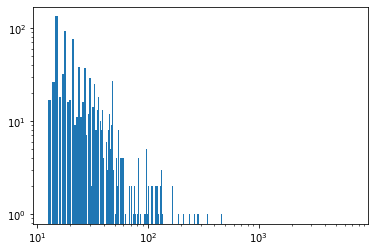

In [80]:
plt.bar(freq2, nn2)
plt.xscale('log')
plt.yscale('log')
plt.show()

> **Interpretation:**
>
> D'après le graphique on constate la présence d'un nombre important des mots ont des fréquences très petites, alors on peut éliminer ces mots tout en gardant le même degré d'information. 

# Exercice 2: calcul de similarité et pertinence de la recherche
## Pondération des termes
### Comparer la fréquence des termes dans un texte et leur tfidf.

In [15]:
def frequency_term(text_tokens):
    count = Counter(text_tokens)
    c = count.items()
    res = [ (item,x/len(text_tokens)) for (item,x) in c]
    return(res)


text_list=[]
text_names=[]
create_tfidf("data/texts")

v = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfidfs = v.fit_transform(text_list)
freq = dict(frequency_term(tokens))     

for term in ['policymakers','sent','rights'] :
    for text in ["rd_1_psg_20_22.txt","rd_1_psg_27_29.txt"] :
        if term not in list(v.vocabulary_):
            tfidf_term = 0.
        else :
            tfidf_term = tfidfs[text_names.index(text),v.vocabulary_[term]]
        print('Le terme : \t', term, '\nLe document : \t', text, '\nTfidfs : \t',
              tfidf_term, '\nLa fréquence : \t', freq.get(term))
        print ("-------------------------------------------------------")

Le terme : 	 policymakers 
Le document : 	 rd_1_psg_20_22.txt 
Tfidfs : 	 0.14430230420971557 
La fréquence : 	 0.00014102345057263657
-------------------------------------------------------
Le terme : 	 policymakers 
Le document : 	 rd_1_psg_27_29.txt 
Tfidfs : 	 0.0 
La fréquence : 	 0.00014102345057263657
-------------------------------------------------------
Le terme : 	 sent 
Le document : 	 rd_1_psg_20_22.txt 
Tfidfs : 	 0.15920258566849116 
La fréquence : 	 0.07685235658321875
-------------------------------------------------------
Le terme : 	 sent 
Le document : 	 rd_1_psg_27_29.txt 
Tfidfs : 	 0.1646483852007802 
La fréquence : 	 0.07685235658321875
-------------------------------------------------------
Le terme : 	 rights 
Le document : 	 rd_1_psg_20_22.txt 
Tfidfs : 	 0.12591050031072093 
La fréquence : 	 0.0003471346475634131
-------------------------------------------------------
Le terme : 	 rights 
Le document : 	 rd_1_psg_27_29.txt 
Tfidfs : 	 0.260434973074505 
La f

* Que constatez-vous en terme de poids par rapport à la fréquence ? Donnez des exemples. À quoi est-ce dû ?

    > On remarque que le poids de chaque mot diffère de son fréquence. En fait le poids indique si un terme décrit bien un document. En d'autres mots, s'il est bien fréquent dans ce document et moins fréquent dans d'autres documents. Si le poids a une grande valeure pour un document donné, alors cela signifie qu'il caractérise bien ce document. Par exemple, dans le test ci dessous, dans le texte "rd_1_psg_27_29", le poids obtenu pour le mot "rights" est égale à 0.2604 alors que sa frequence dans tous les documents est très petite, elle vaut 0.00034. Donc, on peut dire que le mot "rights" a une pertinence lexicale au sein de ce document.
    
    > Pour calculer le poids TF-IDF, on utilise la formule suivante : 
       P = tf $ \times $ log10(N/df)
    Où 
    - Tf : nombre d'occurence du terme w au sein du document D.
    - Df :nombre de documents contenant le terme w.
    - N : nombre total des documents.
    

## Calcul de similarités
On va calculer la similarité entre chaque question et les passages de textes issus du document associé. 
Chaque document est associé àc10 questions. Et on a 16 documents chacun se compose de trois passagés.

In [20]:
res = [[[]]]
N  = 16
Qn = 10
for i in range(1, N + 1):
    res.append([])
    res[i].append([])
    for j in range(1, Qn + 1):
        quest = open("data/questions/rd_" + str(i) + "_q_" + str(j) + ".txt").read()
        sim = []
        psg_exist = True
        k = 1
        while psg_exist:
            try:
                psg = open("data/texts/rd_" + str(i) + "_psg_" + str(k) + "_" + str(k+2) + ".txt").read()
                sim.append(get_similarity(quest, psg, v)[0][0])
                k += 1
            except:
                psg_exist = False
        res[i].append([sim])

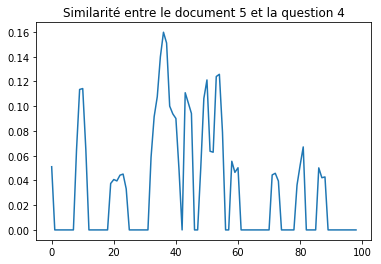

Answer :  36


In [30]:
# Choisir le document
numero_doc = 5     
# Choisir la question
numero_quest = 4 # choose the Question number

plt.plot(res[numero_doc][numero_quest][0])
plt.title("Similarité entre le document " + str(numero_doc) + " et la question " + str(numero_quest))
plt.show()
print("Answer : ", res[numero_doc][numero_quest][0].index(max(res[numero_doc][numero_quest][0])))


* Les textes les plus pertinents le sont-ils réellement selon la référence ? Si ce n’est pas le cas, quels sont les descripteurs responsables ?
    > On note que la similarité ne peut pas toujours conduire à une bonne réponse. Cela est dû au differences des termes utilisés dans la question aux termes contenus dans les passages. Pour améliorer la detection de la réponse, je pense utiliser les lemmes et les racines des termes, sera une bonne solution.